### Here I apply Principle component analysis and clustering to answer the questions as follows:

1. What will a new case be classified in the cases status?
2. What are the chracteristic share by cases? 


The following codes only examine the probablility 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
clean = pd.read_csv("clean_clean_data.csv", index_col=0)

/Users/Henrilin28/.pyenv/versions/dlnd/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (18,27,31,33,44,48,55,58,60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
def createdummies(series, col = None):
    cat_map = {}
    i = 0
    for status in series.unique():
        cat_map[status] = i
        i+=1
    for i in cat_map.items():
        series.replace(i[0], i[1], inplace = True)
    return series, cat_map

In [6]:
clean2 = clean.copy()
for col in clean.columns:
    clean2[col] = createdummies(clean[col])[0]

In [8]:
clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9016 entries, 1 to 16225
Data columns (total 66 columns):
DA Case Status                     9016 non-null int64
Ref Date                           9016 non-null int64
Referral Type                      9016 non-null int64
Ref Agency                         9016 non-null int64
Primary Officer                    9016 non-null int64
Prosecutor                         9016 non-null int64
Unit                               9016 non-null int64
Defendant City                     9016 non-null int64
Defendant State                    9016 non-null int64
Defendant Zip                      9016 non-null int64
Defendant Race                     9016 non-null int64
Defendant Gender                   9016 non-null int64
Defendant's Age at Incident        9016 non-null float64
Defendant’s Arrest Status          9016 non-null int64
CC# Year                           9016 non-null float64
Incident Date                      9016 non-null int64
Municipa

In [5]:
clean2.drop(['Incident Date', 'Ref Date', ""], axis=1, inplace=True)

In [6]:
clean3 = clean2.iloc[:,0:27]

In [7]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(clean3)

In [8]:
print(sklearn_pca.explained_variance_ratio_) 

[ 0.85780052  0.11108486]


In [9]:
sklearn_transf

array([[-357.04658856,  -35.48728761],
       [-355.99132138,  -34.08789801],
       [-354.98505272,  -34.10436011],
       ..., 
       [ 294.95981763,  -18.1423885 ],
       [ 266.74027552,    5.39311349],
       [-189.80246318,  -32.67524409]])

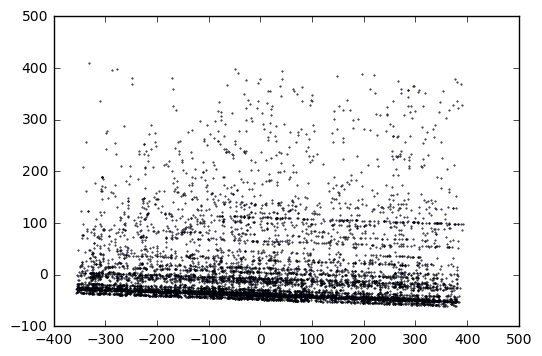

In [10]:
plt.scatter(sklearn_transf[:,0],sklearn_transf[:,1], s=0.2)